In [ ]:
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [ ]:
!pip install pandas_datareader

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=170ebb77cdd479538b93176549febf45bcd1259764cd89994267158f9aac5aed
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# the data was pulled live using the 'yfinance' api
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

df = pdr.get_data_yahoo("GOLD", start="2010-01-01", end="2021-01-02")
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,40.700001,41.180000,40.250000,40.389999,34.735146,14212200
2010-01-05,40.660000,41.099998,40.040001,40.889999,35.165131,13018600
2010-01-06,41.320000,42.340000,41.139999,41.759998,35.913334,12329200
2010-01-07,41.669998,41.669998,40.889999,41.169998,35.405933,9291000
2010-01-08,41.599998,41.669998,40.700001,41.430000,35.629536,9198600
...,...,...,...,...,...,...
2020-12-24,22.799999,23.040001,22.730000,22.900000,22.580746,4920100
2020-12-28,23.520000,23.540001,22.799999,22.840000,22.521585,15946700
2020-12-29,22.959999,23.280001,22.750000,22.910000,22.590607,14663900


In [ ]:
df.shape


(2769, 6)

<function matplotlib.pyplot.show>

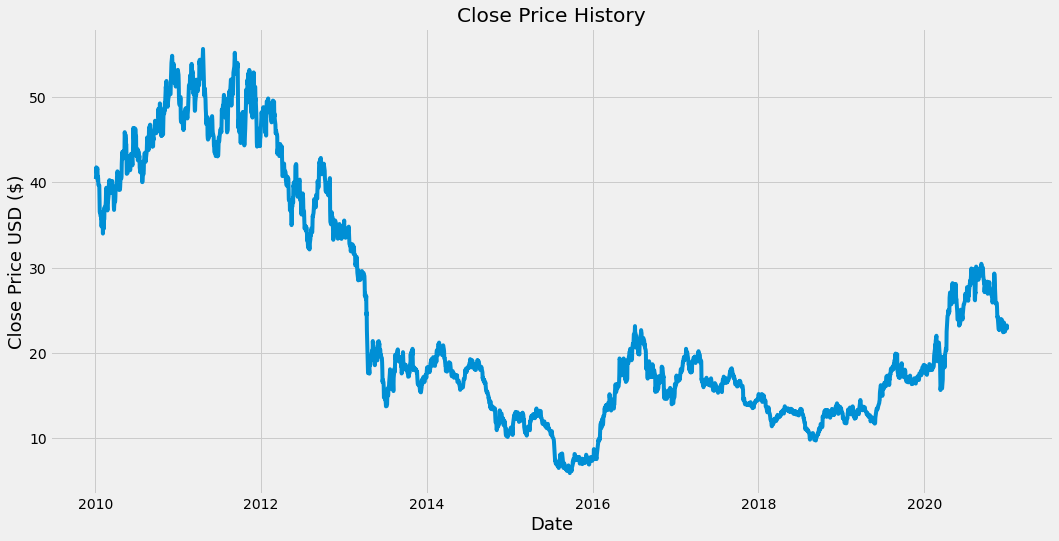

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = (len(dataset) * .8)
training_data_len

2215.2000000000003

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.69329842],
       [0.70336081],
       [0.72086934],
       ...,
       [0.3415174 ],
       [0.34815857],
       [0.33890119]])

In [ ]:
!pip install scikit-mlm 

In [ ]:
train_data = scaled_data[0:int(training_data_len) , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.69329842, 0.70336081, 0.72086934, 0.70899572, 0.71422821,
       0.71845439, 0.69148719, 0.69953713, 0.69490844, 0.67941236,
       0.67860735, 0.64258399, 0.61541557, 0.61501307, 0.60575569,
       0.60635941, 0.59971827, 0.60313945, 0.58120344, 0.61501307,
       0.60917686, 0.60313945, 0.56470113, 0.60152951, 0.57617225,
       0.59830947, 0.59851076, 0.62648418, 0.61903804, 0.63393033,
       0.64238277, 0.66995369, 0.67277114, 0.65264637, 0.63050915,
       0.61923925, 0.63393033, 0.6383578 , 0.65425639, 0.67478367,
       0.68826723, 0.6814248 , 0.69068218, 0.67900985, 0.6761924 ,
       0.66029381, 0.66894747, 0.66653251, 0.66552621, 0.68726101,
       0.68866973, 0.6810223 , 0.67377737, 0.67357615, 0.66170254,
       0.62990543, 0.62044677, 0.63332661, 0.64137655, 0.64037025])]
[0.6520426531740977]

[array([0.69329842, 0.70336081, 0.72086934, 0.70899572, 0.71422821,
       0.71845439, 0.69148719, 0.69953713, 0.69490844, 0.67941236,
       0.67860735, 0.64258399, 0.615

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(2155, 60)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2155, 60, 1)

In [ ]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2155/2155 [==============================] - 65s 29ms/step - loss: 0.0029


In [ ]:
test_data = scaled_data[int(training_data_len) - 60: , :]
x_test = []
y_test = dataset[int(training_data_len):, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
x_test = np.array(x_test)


In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.8433919348871665

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

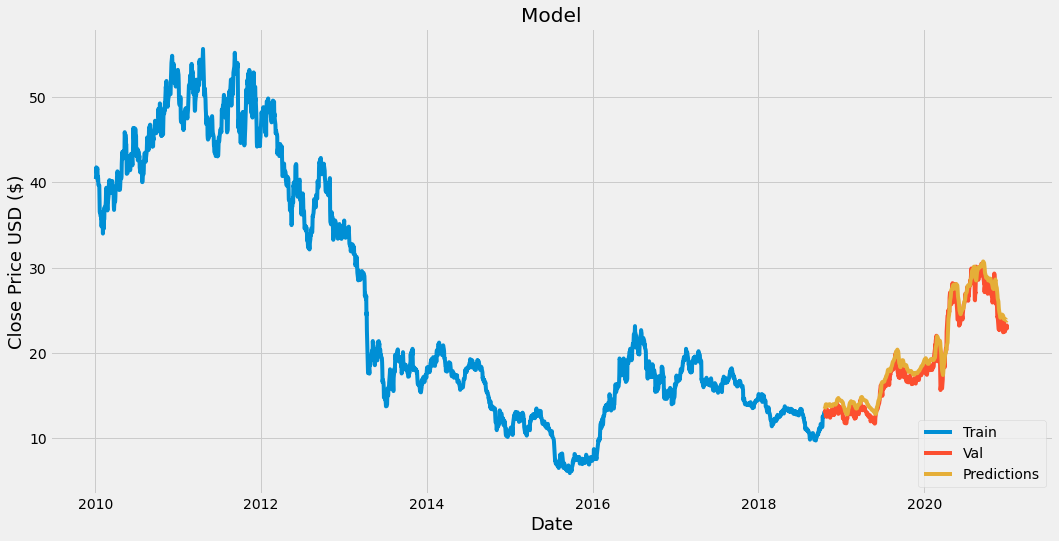

In [ ]:
train = data[:int(training_data_len)]
valid = data[int(training_data_len):]
valid['Predictions'] = predictions

# Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show

In [ ]:
valid

,Close,Predictions
Date,,
2019-04-29,12.660000,14.082788
2019-04-30,12.720000,14.017940
2019-05-01,12.590000,13.959660
2019-05-02,12.510000,13.896970
2019-05-03,12.590000,13.829753
...,...,...
2021-08-17,19.969999,21.669523
2021-08-18,19.459999,21.561604
2021-08-19,19.129999,21.412395


In [ ]:
# Predicting a value for a future date
yf.pdr_override()

apple_quote = pdr.get_data_yahoo("TSLA", start="2012-01-01", end="2019-12-18")
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
[[73.23489]]


In [ ]:
yf.pdr_override()

apple_quote2 = pdr.get_data_yahoo("TSLA", start="2019-12-17", end="2019-12-20")
print(apple_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-17    75.797997
2019-12-18    78.629997
2019-12-19    80.807999
Name: Close, dtype: float64


In [ ]:
rmse = np.sqrt( np.mean( pred_price - y_test )**2 )


train = data[:int(training_data_len)]
valid = data[int(training_data_len):]
valid['Predictions'] = predictions


# Visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show